In [1]:
# Step 1: Generate Simulated Data
import pandas as pd
import numpy as np
from faker import Faker
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Set seed for reproducibility
random.seed(42)
np.random.seed(42)

fake = Faker()

def generate_simulated_data(num_users=1000):
    data = []
    for _ in range(num_users):
        user_id = fake.uuid4()
        age = random.randint(18, 65)
        gender = random.choice(['Male', 'Female'])
        session_duration = np.random.exponential(60)  # Simulating session duration
        content_preference = random.choice(['Webinar', 'Video', 'Document'])
        engagement_score = random.uniform(0, 1)

        data.append([user_id, age, gender, session_duration, content_preference, engagement_score])

    columns = ['UserID', 'Age', 'Gender', 'SessionDuration', 'ContentPreference', 'EngagementScore']
    df = pd.DataFrame(data, columns=columns)
    return df

# Generate a dataset with 1000 users
simulated_data = generate_simulated_data()

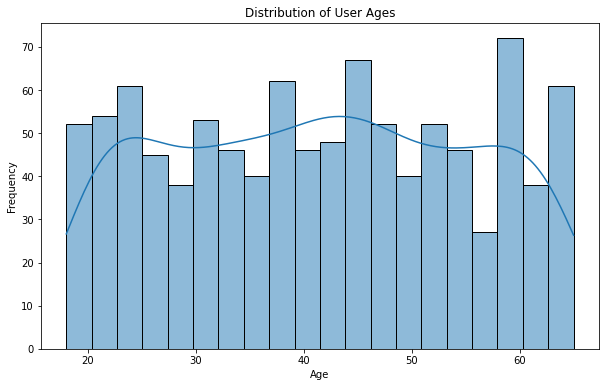

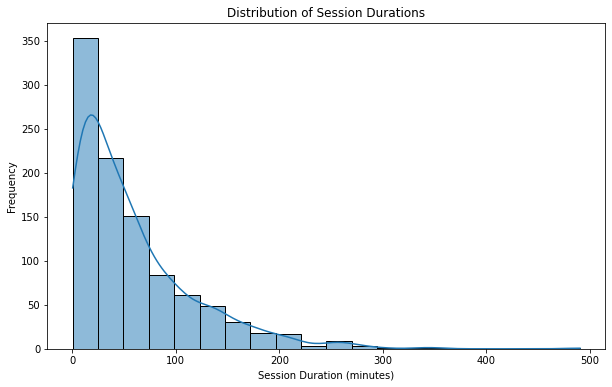

In [2]:
# Step 2: Data Cleaning and Preprocessing
# No specific cleaning is required for this simplified example

# Step 3: Basic Exploratory Data Analysis (EDA)
# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(simulated_data['Age'], bins=20, kde=True)
plt.title('Distribution of User Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Distribution of Session Duration
plt.figure(figsize=(10, 6))
sns.histplot(simulated_data['SessionDuration'], bins=20, kde=True)
plt.title('Distribution of Session Durations')
plt.xlabel('Session Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

C:\Users\ytjya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


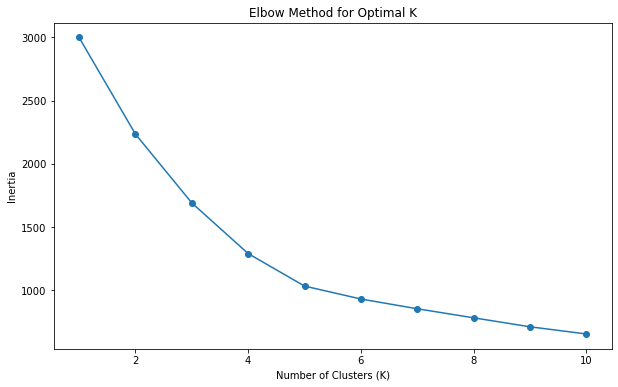

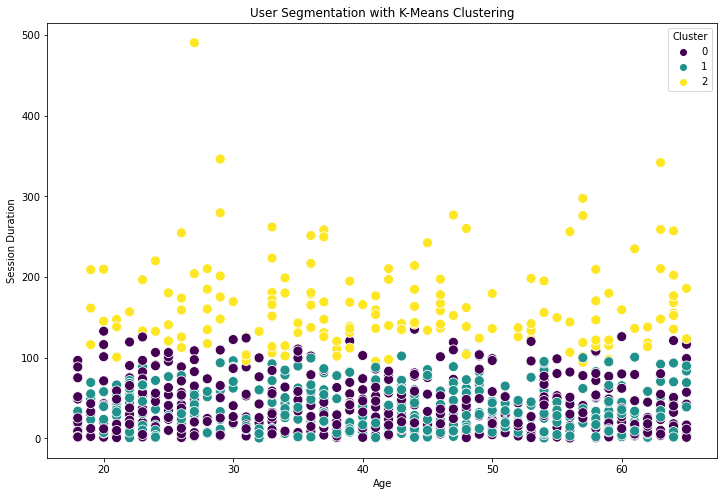

In [3]:
# Additional import for clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 4: User Segmentation with K-Means Clustering
# Select relevant features for clustering
features_for_clustering = ['Age', 'SessionDuration', 'EngagementScore']

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(simulated_data[features_for_clustering])

# Determine the optimal number of clusters (k) using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

# Based on the Elbow Method, choose an optimal value for k (number of clusters)
optimal_k = 3  # You can adjust this based on the visual inspection of the elbow plot

# Apply K-Means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
simulated_data['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualize the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Age', y='SessionDuration', hue='Cluster', data=simulated_data, palette='viridis', s=100)
plt.title('User Segmentation with K-Means Clustering')
plt.xlabel('Age')
plt.ylabel('Session Duration')
plt.show()


In [ ]:
# Additional imports for A/B Testing
from scipy.stats import ttest_ind

# Step 5: A/B Testing
# Assuming we want to test the impact of personalized content on user engagement

# Create a copy of the dataset for A/B testing
ab_test_data = simulated_data.copy()

# Introduce a new feature indicating whether a user receives personalized content (1 for yes, 0 for no)
ab_test_data['PersonalizedContent'] = np.random.choice([0, 1], size=len(ab_test_data), p=[0.5, 0.5])

# Simulate the impact of personalized content on engagement score
ab_test_data['EngagementScore'] += ab_test_data['PersonalizedContent'] * 0.2  # Adding a positive impact

# Split the dataset into control (no personalized content) and treatment (personalized content) groups
control_group = ab_test_data[ab_test_data['PersonalizedContent'] == 0]['EngagementScore']
treatment_group = ab_test_data[ab_test_data['PersonalizedContent'] == 1]['EngagementScore']

# Conduct a t-test to compare the means of the two groups
t_stat, p_value = ttest_ind(control_group, treatment_group)

# Print the results
print(f'Test Statistic: {t_stat}')
print(f'P-value: {p_value}')

# Determine statistical significance
alpha = 0.05
if p_value < alpha:
    print("Results are statistically significant. Personalized content has a significant impact.")
else:
    print("Results are not statistically significant. No significant impact observed.")

# Visualize the A/B test results
plt.figure(figsize=(10, 6))
sns.boxplot(x='PersonalizedContent', y='EngagementScore', data=ab_test_data)
plt.title('A/B Test: Impact of Personalized Content on User Engagement')
plt.xlabel('Personalized Content')
plt.ylabel('Engagement Score')
plt.show()
